<a href="https://colab.research.google.com/github/NatnaelMengistu1/DS/blob/main/Basic_Linear_Regression_KNN1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Continious Valued Data Generator


In [7]:
class ContValData():

  def random_seed(rseed):
    np.random.seed(rseed)

  def create(self, D, N, r=20):
    self.X = np.linspace(0, r , N).reshape(N,D) # numberof  , Dimension
    self.y = np.sqrt(self.X)+np.exp(-(self.X-5)**2)-2*(np.exp(-(self.X-12.5)**2) + np.random.randn(N,1)*0.2)
    return self.X, self.y

  def show(self):
    plt.figure()
    plt.scatter(self.X, self.y)


In [8]:
dat = ContValData()

In [9]:
X,y=dat.create(1,200)

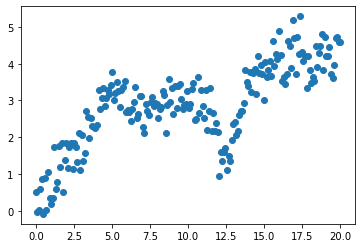

In [10]:
dat.show()

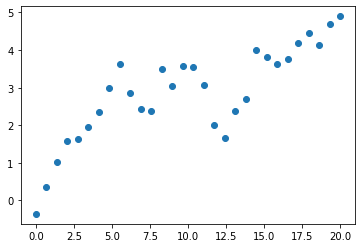

In [12]:
MyDat = ContValData()
X_test, y_test = MyDat.create(1,30)
MyDat.show()

##  Simple Linear Regression

In [17]:
class simpleLinearRegression():

  def fit(self,X,y):
    self.y = y
    self.d = np.mean(X**2) - np.mean(X)**2  #denominator
    self.w0 = (np.mean(y)*np.mean(X**2)-np.mean(X)*np.mean(X*y))/self.d
    self.w1 = (np.mean(X*y)-(np.mean(X)*np.mean(y)))/self.d


  def predict(self, X, show=0):
    y_hat = self.w1*X + self.w0

    if show:
      plt.figure()
      plt.scatter(X, self.y, s = 8)
      plt.plot(X, y_hat, color = "#FF0070")
    return y_hat


In [18]:
slr = simpleLinearRegression()

In [19]:
slr.fit(X,y)

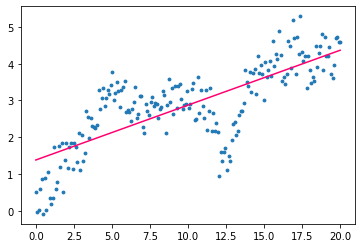

In [20]:
y_hat = slr.predict(X , show =1)

In [21]:
y2 = y**2

In [22]:
lr1 = simpleLinearRegression()
lr1.fit(X,y2)

In [23]:
y_hat2 = lr1.predict(X)

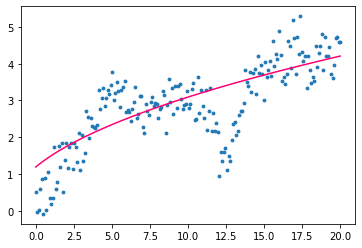

In [25]:
plt.figure()
plt.scatter(X,y,s=8)
plt.plot(X, np.sqrt(y_hat2), color = "#FF0070")

## kNN Regression

Define a radius:

$radious (V_R) = \vert\vert x_{{k}} - x\vert\vert$

$ \gamma_k = \frac{1}{\vert\vert x_{(k)} - x \vert\vert + \epsilon } $

In [26]:
class KNNRegressor():
  def fit(self, X, y):
    self.X = X
    self.y = y

  def predict(self, X , K, epsilon = 1e-3):
    N = len(X)
    y_hat = np.zeros(N)

    for i in range(N):
      dist2 = np.sum((self.X - X[i])**2 , axis =1)
      idxt = np.argsort(dist2)[:K]
      gamma_k = np.exp(-dist2[idxt]) / np.exp(-dist2[idxt]).sum()
      y_hat[i] = gamma_k.dot(self.y[idxt])


    return y_hat


In [27]:
knnr = KNNRegressor()

In [28]:
knnr.fit(X,y)

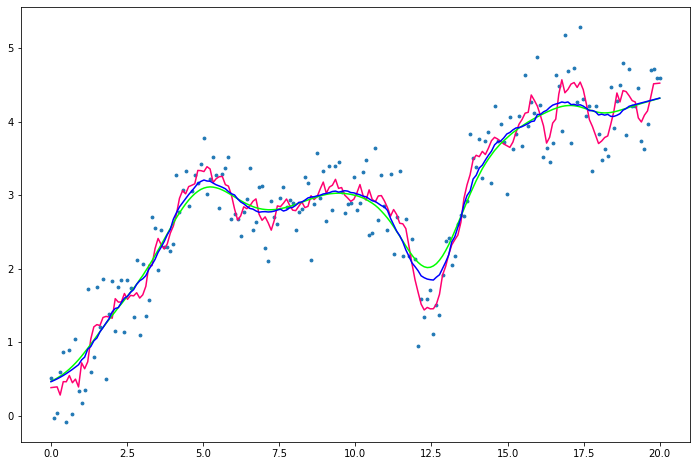

In [33]:
y_hat = knnr.predict(X,5)
y_hat2 = knnr.predict(X,40)
y_hat3 = knnr.predict(X,20)

plt.figure(figsize = (12,8))
plt.scatter(X,y, s=8)
plt.plot(X,y_hat, color ="#FF0070")
plt.plot(X,y_hat2, color ="#00FF00")
plt.plot(X,y_hat3, color ="#0000FF")